# Telecom Customer Churn Prediction

<div style="text-align: center;" style="border: 2px solid black;">
    <img src="images/Customer-Churn.jpeg" alt="Bubble Chart" width="600" height="400">
</div>

# Project Overview

SyriaTel faces a challenge with customer churn, impacting revenue and market standing. This project aims to predict churn using key features like customer service calls, daytime call minutes, and international plan subscriptions. We conduct exploratory data analysis to identify patterns and correlations. By selecting crucial features and training various classifier models, we aim to maximize the F1 score, while also considering AUC-ROC and accuracy. The best model will provide actionable insights, enabling SyriaTel to implement targeted retention strategies, improve customer satisfaction, and reduce churn, thereby driving business growth and maintaining a competitive edge in the telecom industry.

## Business Problem
My client, SyriaTel, is a telecommunications company facing a significant challenge: customer churn. They've noticed an increasing number of customers leaving their service, which is not only impacting their revenue but also their reputation in the market. To address this issue effectively, SyriaTel has approached me to develop a predictive model that can identify potential churners and provide insights to help reduce churn rates.

The primary objective of this project is to develop a churn prediction model that accurately identifies customers at risk of leaving SyriaTel's service. By leveraging historical customer data, we aim to build a classifier model that can predict churn patterns based on key features such as the number of customer service calls, total minutes spent on calls during the day, and whether the customer subscribes to the international plan




## Data Understanding

Our data source is the SyriaTel customer churn dataset. The dataset includes 20 features related to customer subscriptions to SyriaTel, such as account length, number of calls at various times, the associated charges to their account for those calls, and the number of calls made to customer service lines in regard to their subscription.

>Some limitations I found 'churn', our target, had an imbalanced class we needed to corrrect.
>- churn:_Whether the customer churned or not (True/False).


Summary of Features in the Dataset:

- state: the state the customer lives in
- account length: the number of days the customer has had an account
- area code: the area code of the customer
- phone number: the phone number of the customer
- international plan: true if the customer has the international plan, otherwise false
- voice mail plan: true if the customer has the voice mail plan, otherwise false
- number vmail messages: the number of voicemails the customer has sent
- total day minutes: total number of minutes the customer has been in calls during the day
- total day calls: total number of calls the user has done during the day
- total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
- total eve minutes: total number of minutes the customer has been in calls during the evening
- total eve calls: total number of calls the customer has done during the evening
- total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
- total night minutes: total number of minutes the customer has been in calls during the night
- total night calls: total number of calls the customer has done during the night
- total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
- total intl minutes: total number of minutes the user has been in international calls
- total intl calls: total number of international calls the customer has done
- total intl charge: total amount of money the customer was charged by the Telecom company for international calls
- customer service calls: number of calls the customer has made to customer service
- churn: true if the customer terminated their contract, otherwise false

#### import necessary modules

In [2]:
#  Import the neecessary Libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [3]:
# Reading in the dataset with Pandas.
data= pd.read_csv('churn.csv')

In [4]:
# First five values of a the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Dataset Info

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### Statistical Summary of the dataset

In [6]:
# Exploring the statistical summary of the datset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


>- Majority of the columns are numeric
>- The summary statistics gives the standard deiation,the minimum, the maximum, the 25% percentile, the median, 75%percentile and the maximum values of each feature

In [7]:
#  Looking at the statistical summary of the dataset it looks like the dataset has no null value
# The international plan column and voice plan column have a class imbalance
data.describe(include=object).T

,count,unique,top,freq
state,3333,51,WV,106
phone number,3333,3333,382-4657,1
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


> - The phone number column is a unique identifier of each customer because it has  3333 unique values
> - Both the `international plan` and `voice mail plan` have a class imbalance with no being the most

### Data Cleaning

#### Checking for duplicates

In [8]:
data.duplicated().sum()

0

>The dataframe has no null values

#### Checking for null values

In [9]:
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

>The dataset has no null value

#### Checking for outliers in the dataset

#### Dealing with outliers

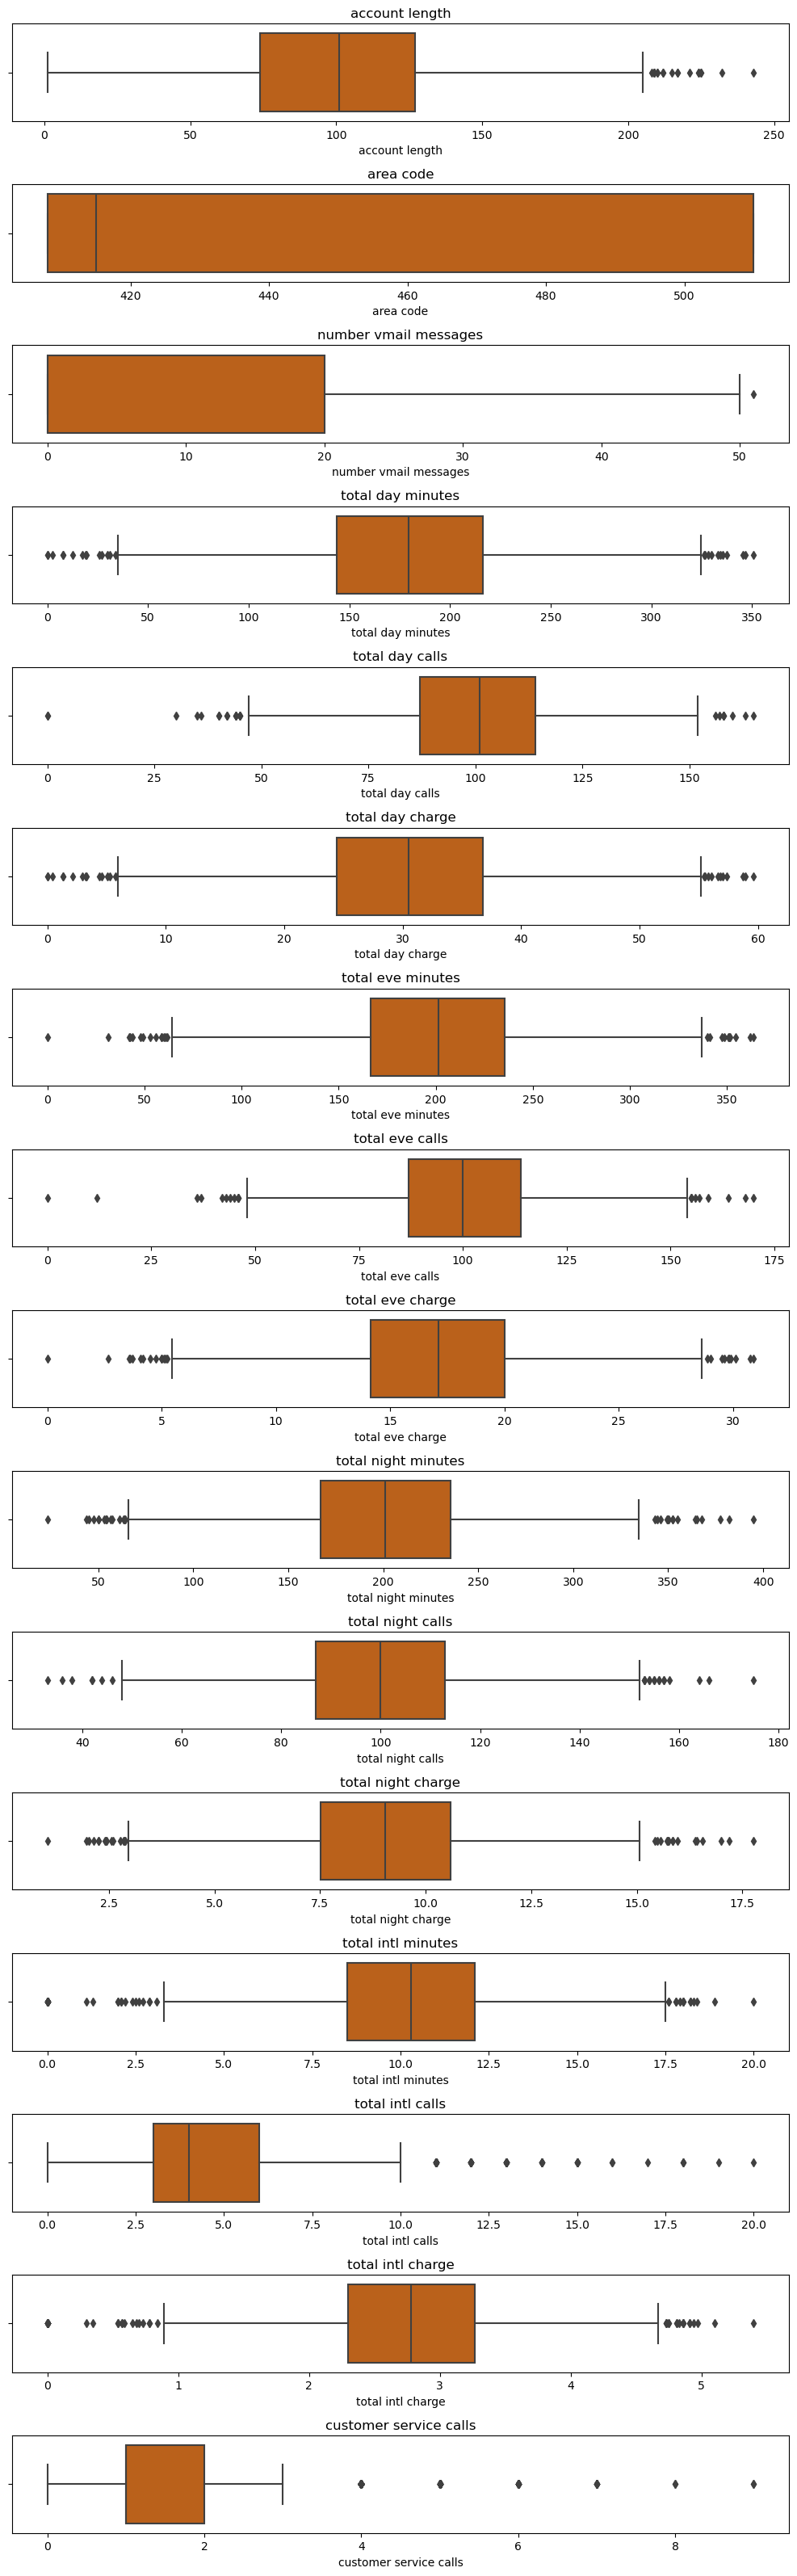

In [10]:
# numeric columns
 
numeric_cols = data.select_dtypes(include='number').columns

# figure
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 2 * len(numeric_cols)))

# Loop through each numeric column and create a boxplot
for ax, col in zip(axes, numeric_cols):
 
    sns.boxplot(x=data[col], ax=ax, color = '#D55E00')
    ax.set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Given the data is from Syriatel Telecommunication Company, I have concluded that I will retain all outliers. These outliers could represent significant patterns or behaviors relevant to customer churn, making them valuable for the analysis and ensuring a more comprehensive understanding of the dataset.

## EDA

### Univariate Analysis

Histograms of the dataframe's features to better understand the distribution.

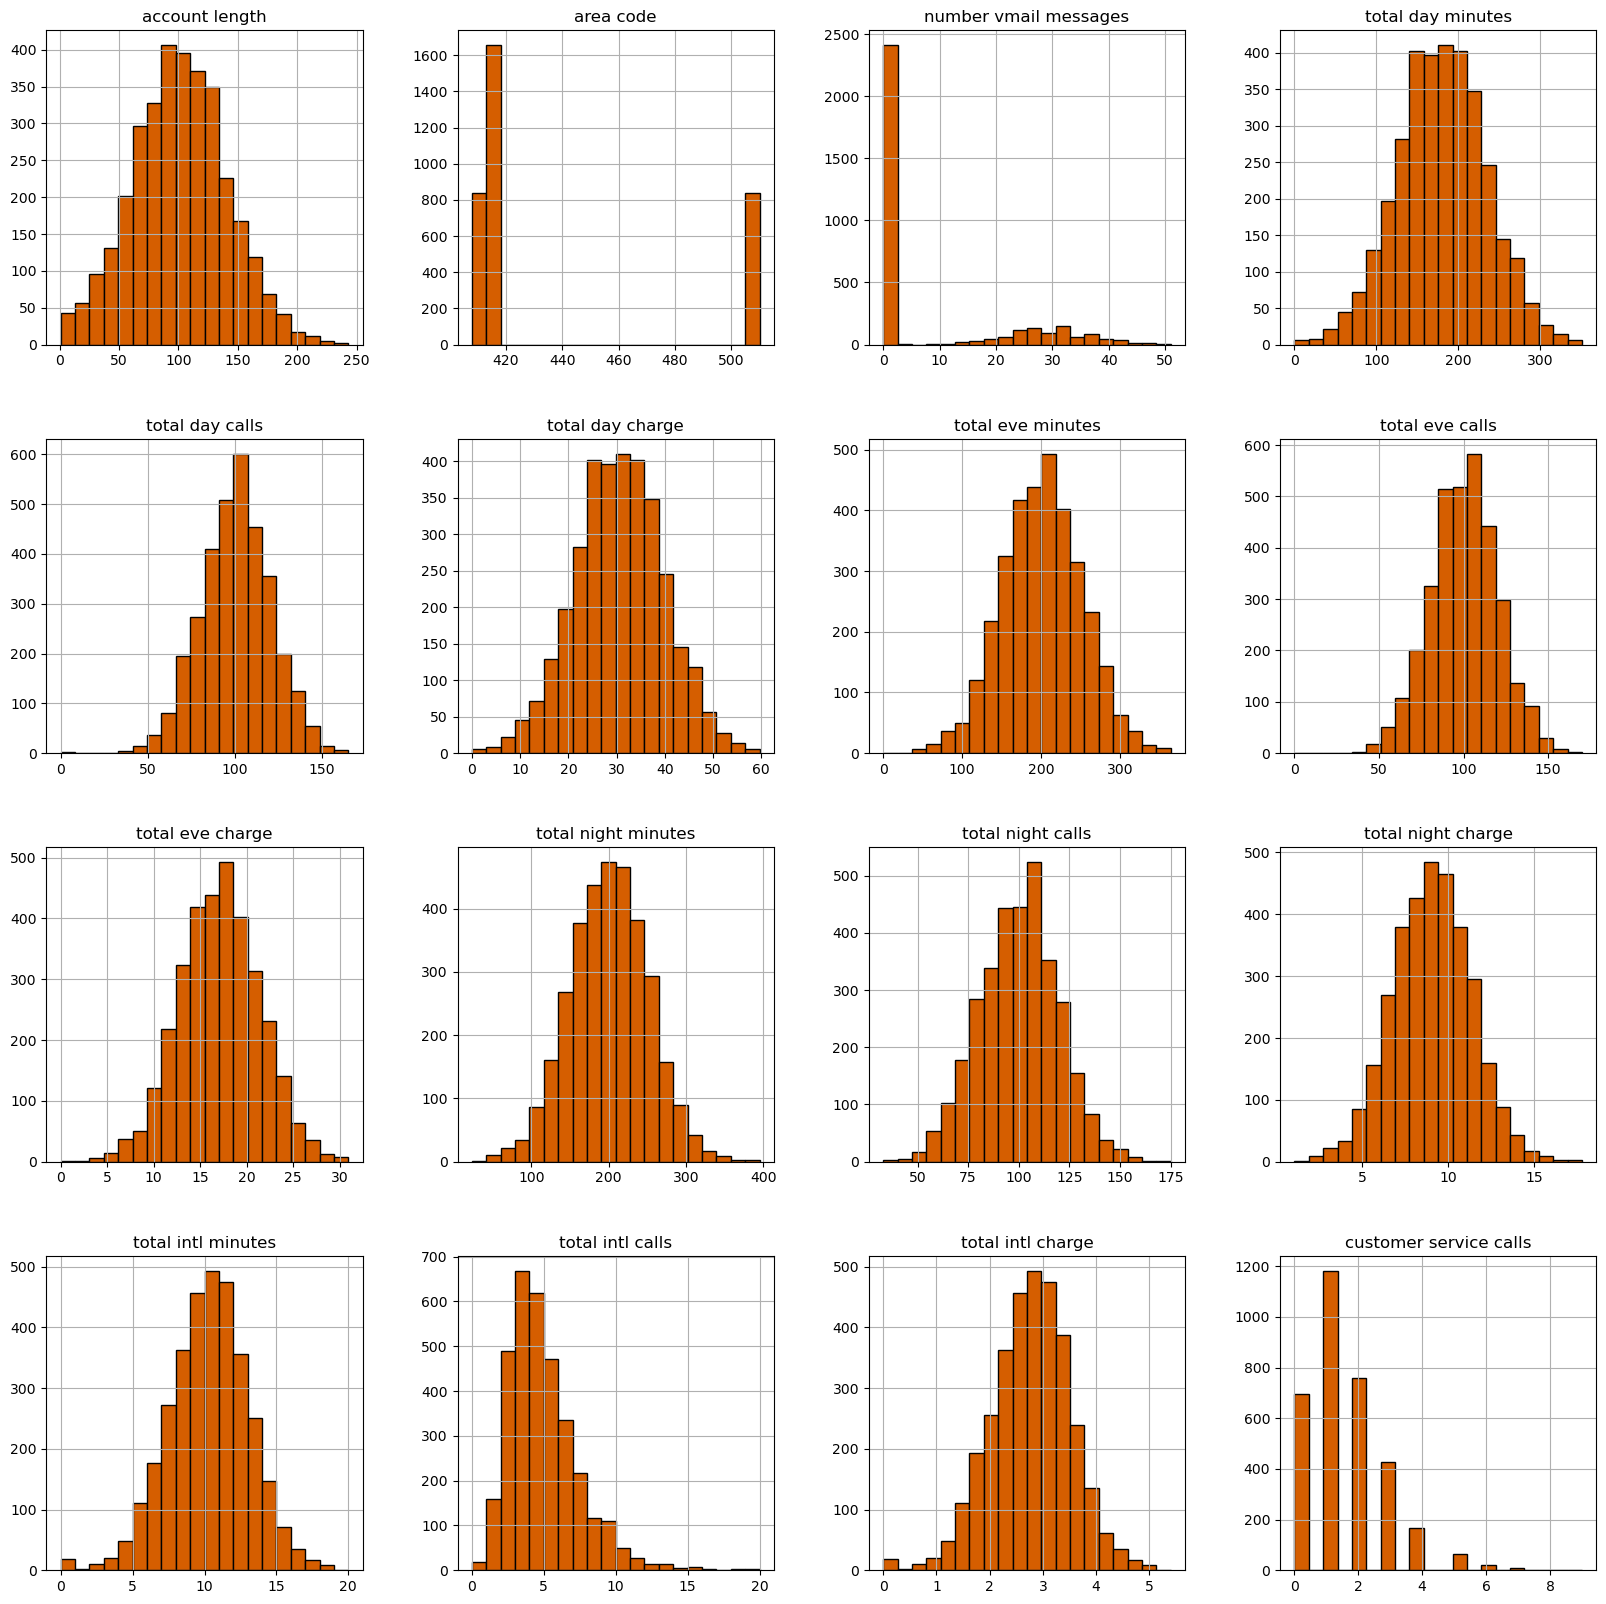

In [11]:
# We prepared histograms of the dataframe's features to better understand the distribution.
data.hist(figsize= (20,20), bins = 20, edgecolor ='black', color='#D55E00');

>- Most of the columns have a normal distribution that is the `acccount length`,`total day minutes`,`total day cherage`, `total day calls`,`total eve 
 minutes`, `total eve calls`,`total eve charge`,`total night minutes`, `total night calls`,`total night charge`,`total intl minutes`,`total intl charge`
>- `total intl calls` is skewed to the right

#### Visualizing the churn column

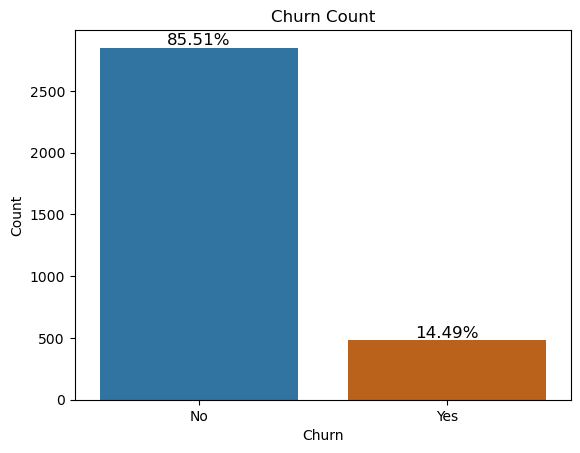

In [12]:
# Calculate churn percentages
churn_counts = data['churn'].value_counts(normalize=True) * 100

# Plotting the count of churned vs non-churned customers
ax = sns.countplot(data=data, x='churn', palette=['#1f77b4', '#D55E00'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

#  percentage on each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{churn_counts[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


> The `Churn` column shows class imbalace where churn No is 85.51% and Churn Yes is at 14.49%

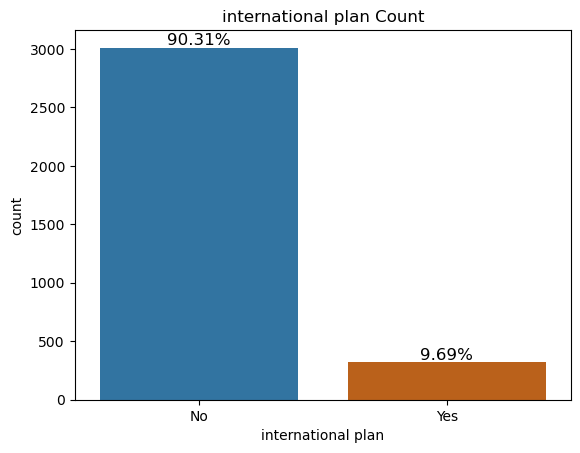

In [13]:
# Calculate churn percentages
churn_counts = data['international plan'].value_counts(normalize=True) * 100

# Plotting the count of churned vs non-churned customers
ax = sns.countplot(data=data, x='international plan', palette=['#1f77b4', '#D55E00'])
plt.xlabel('international plan')
plt.title('international plan Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

#  percentage on each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{churn_counts[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

### Bivariate Analysis

#### Churn By State

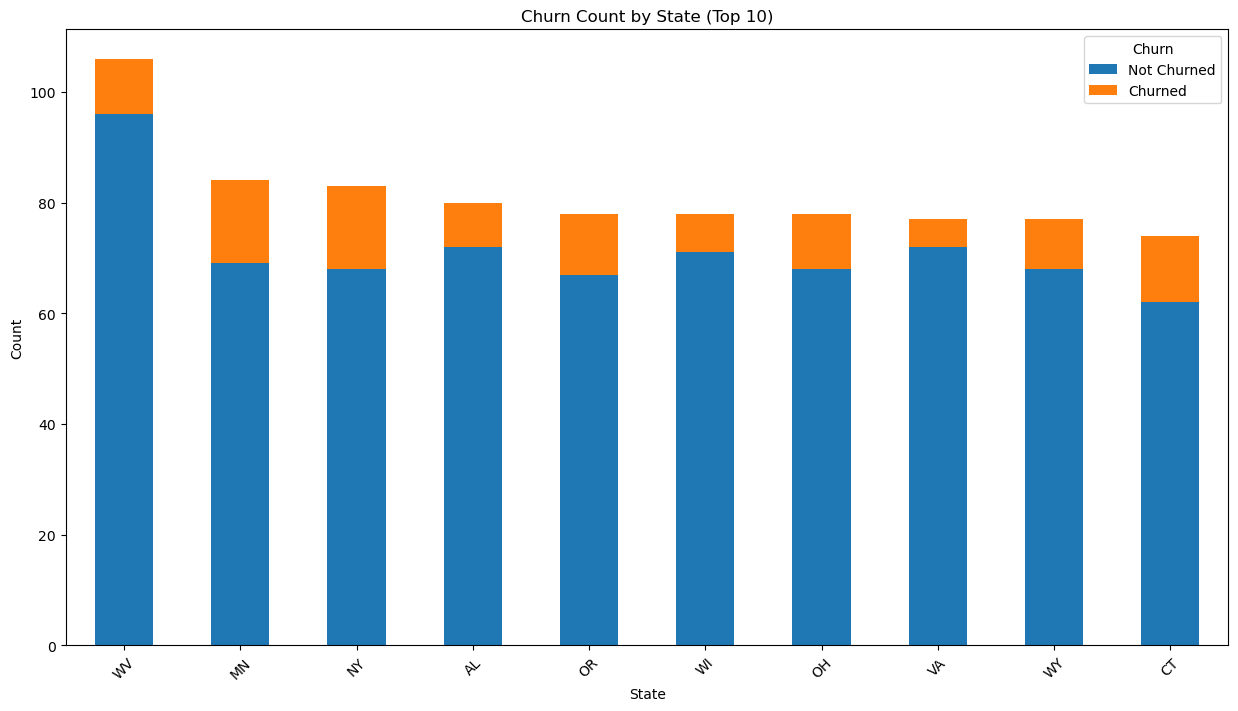

In [14]:
# Calculate churn counts for each state
state_churn = data.groupby(["state", "churn"]).size().unstack()

# Sort states by churn count
top_10_states = state_churn.sum(axis=1).sort_values(ascending=False).head(10).index

# the top 10 states
state_churn_top = state_churn.loc[top_10_states]

# Plotting the count of customers who churned and those who did not churn for the top 10 states
state_churn_top.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Churn Count by State (Top 10)')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


`WV` state has the most retained customers who still are loyal to Syria Tel Telecommunication Comapny

Churn rate by Area Code

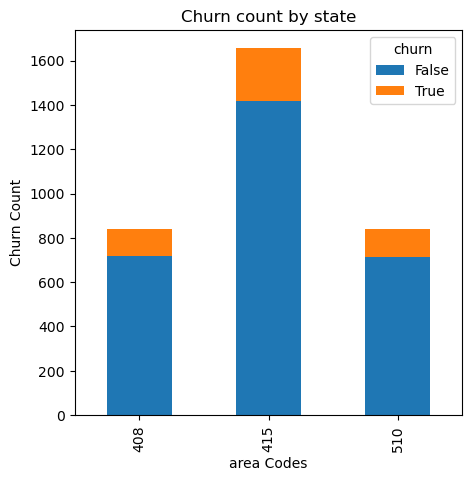

In [15]:
# Visualize churn count by state
data.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.title('Churn count by state')
plt.xlabel('area Codes')
plt.ylabel('Churn Count');

Customers from with area codes `415` tend to churn most compared to customers with area codes `408` and `510`

#### Churn Count by international Plan

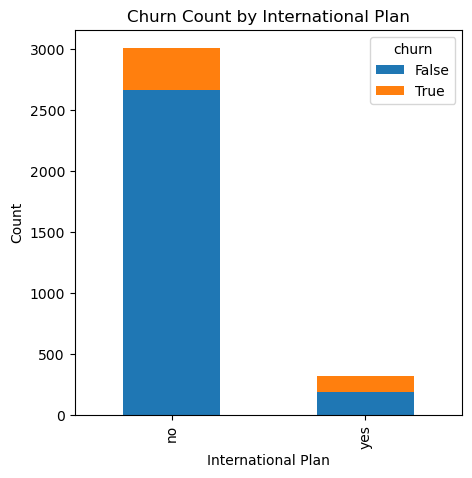

In [16]:
# Visualizing churn Count by international plan
data.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

# Set xlabel, ylabel and title
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.title('Churn Count by International Plan');

> Customers with no international plan are morely to Churn compared to cutomers with an international plan

#### Churn by customers voice mail

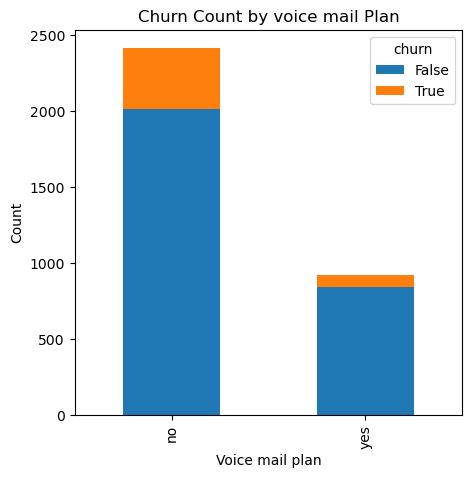

In [17]:
# Churn count by customers voice mail
data.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

# Set Xlabel, ylabel and title
plt.xlabel('Voice mail plan')
plt.ylabel('Count')
plt.title('Churn Count by voice mail Plan');

> Looking at the above plot It seems customers who have no voice plan Tend to Churn more Compared to the customers with voice plan

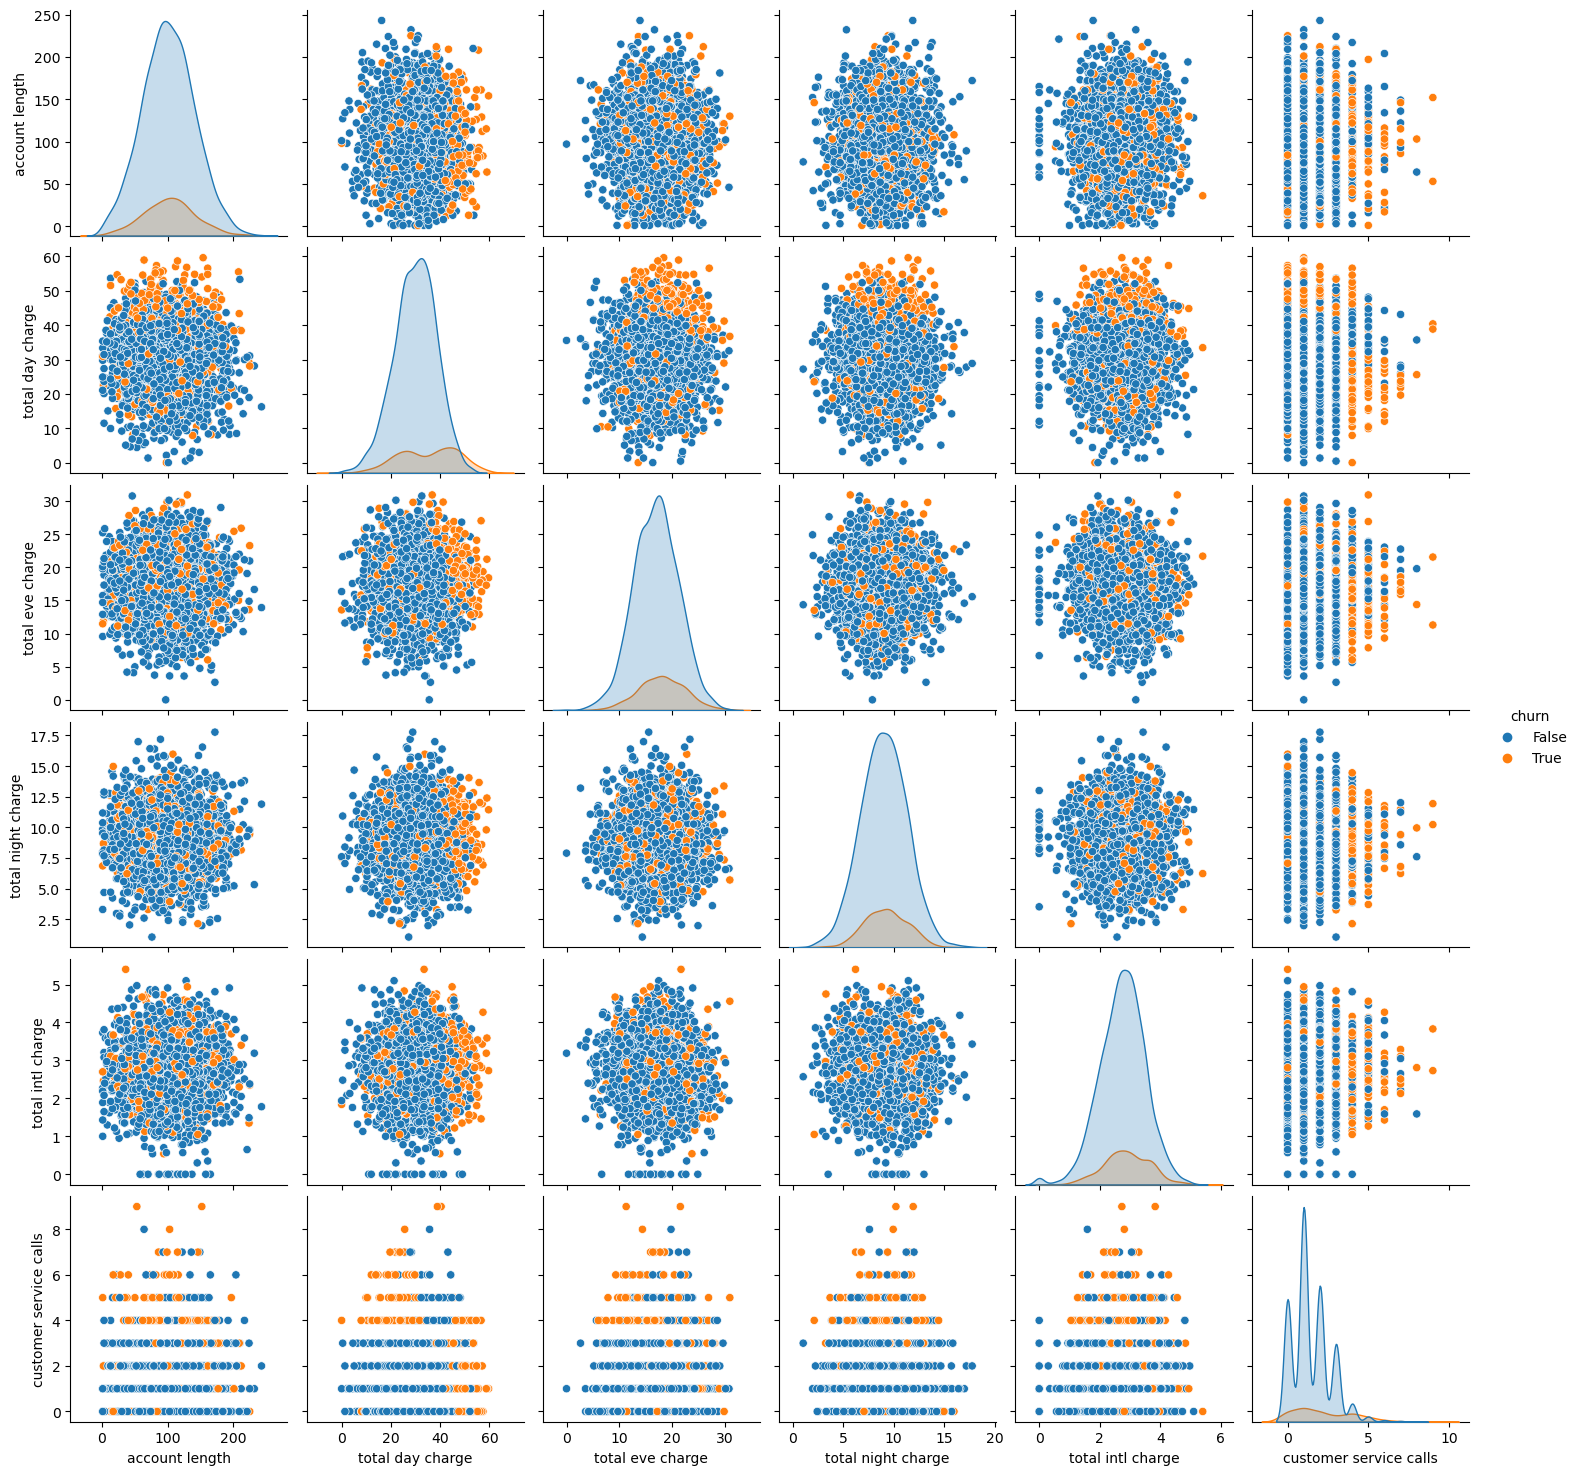

In [18]:
# Building paiplot 
sns.pairplot(data,vars=['account length','total day charge',\
                            'total eve charge','total night charge', \
                            'total intl charge','customer service calls'],hue='churn')
plt.show()

In [19]:
# Dummying of the international plan and voice mail plan columns,
 
data = pd.get_dummies(data,columns=['international plan', 'voice mail plan'], drop_first= True, dtype= int)

In [20]:
# Check the original dataset to see if the dummies have been put into place
data.head()

,state,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,KS,128,415,382-4657,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,False,0,1
1,OH,107,415,371-7191,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,False,0,1
2,NJ,137,415,358-1921,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,False,0,0
3,OH,84,408,375-9999,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,False,1,0
4,OK,75,415,330-6626,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,False,1,0


In [21]:
data.drop(columns = ['state','phone number'],inplace = True)

#### Correlation

In [22]:
# Select numerical data for only float64 and int64 datatype
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


#### Heatmap

<Axes: >

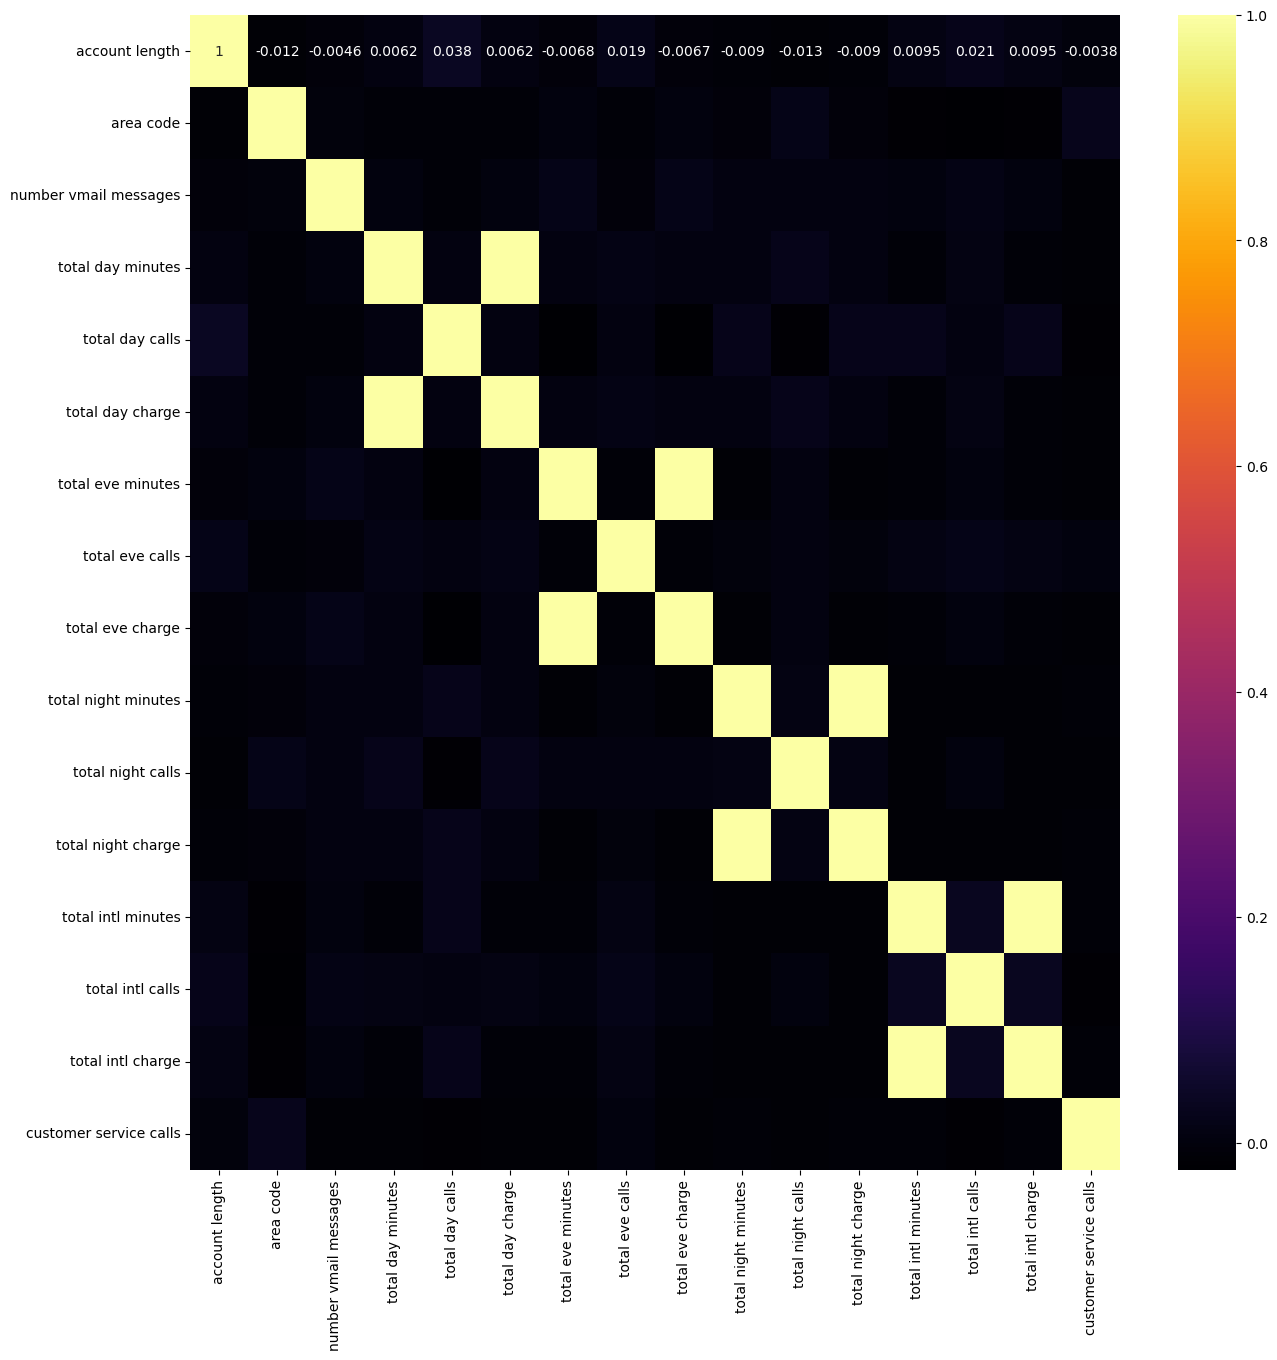

In [23]:
# Plotting a heatmap to check for correlation and if there is multicollinearity
plt.figure(figsize= (15,15))
sns.heatmap(numeric_data.corr(), annot=True,cmap ='inferno')

### Checking For Multicolllinearity

Variance Inflation Factor (VIF) is a measure used to detect the presence and severity of multicollinearity in a regression analysis. Multicollinearity occurs when predictor variables in a model are highly correlated, which can lead to unstable estimates of regression coefficients and reduce the interpretability and predictive power of the model.Am going to use (VIF) to check for multicolllinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume your dataframe is df
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate VIF for each feature
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(len(dataframe.columns))]
    return vif_data

vif_data = calculate_vif(numeric_data)
print(vif_data)


                   feature           VIF
0           account length  7.301164e+00
1                area code  6.108796e+01
2    number vmail messages  1.607147e+01
3        total day minutes  1.246260e+08
4          total day calls  2.362073e+01
5         total day charge  1.246305e+08
6        total eve minutes  3.742375e+07
7          total eve calls  2.375475e+01
8         total eve charge  3.742509e+07
9      total night minutes  1.072035e+07
10       total night calls  2.462797e+01
11      total night charge  1.072000e+07
12      total intl minutes  9.983549e+05
13        total intl calls  4.275759e+00
14       total intl charge  9.987231e+05
15  customer service calls  2.405351e+00
16  international plan_yes  1.117372e+00
17     voice mail plan_yes  1.645721e+01


**Results:**
>VIF < 5: Generally considered acceptable.
>
> VIF between 5 and 10: Indicates moderate multicollinearity.
>
> VIF > 10: Indicates high multicollinearity.
Based on your results:
total day minutes, total day charge, total eve minutes, total eve charge, total night minutes, and total night charge have extremely high VIF values, suggesting strong multicollinearity among these variables.
area code also has a high VIF value, indicating multicollinearity with other predictors.
 
 
These features have high multicollinearity. It means that these features are highly correlated with one another, leading to redundancy in the dataset. This can cause issues in regression models, such as inflated standard errors for the coefficients, making it difficult to assess the effect of each predictor.

To address multicollinearity, I will consider the following steps:
>Remove or Combine Highly Correlated Features:
>I will remove either total day minutes or total day calls, as they are likely providing similar information. The same approach can be applied to the evening, night, and international minute/call features.


`Charge` columns have a correlation of 1 to their corresponding
`minutes` columns. I will drop the charge column.voicemail messages is corresponding to 'voicemail plan_yes' so i will also drop it.

#### Dropping the multicollinerated features

In [25]:
data = data.drop(columns=['number vmail messages', 'total day charge', 'total eve charge',
 'total night charge', 'total intl charge'])

#### Feature Selection

 I will do feature selection where I will correlate eAch feature with the target variable `churn` .If a feature has a very low correlation I will not consider it as effective for the modelling process 

In [26]:
data.corr()['churn'].sort_values(ascending=False)

churn                     1.000000
international plan_yes    0.259852
customer service calls    0.208750
total day minutes         0.205151
total eve minutes         0.092796
total intl minutes        0.068239
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
voice mail plan_yes      -0.102148
Name: churn, dtype: float64

In [28]:
# This shows that 14.49 percent of syria Tel company have churned
data.churn.value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

## Modelling

In this process am going to going to follow the following processes:
- Train Test Split
- Preprocessing
- Baseline model which is the Logistic Regression model
- Decision tree classifier 
- Random tree classifier
- Solving the issue of Class imbalance

#### TrainTest Split


Performing a train-test split is a fundamental step in building a machine learning model, ensuring that we have separate datasets for training the model and evaluating its performance.

In [29]:
# I will split my datset into X_train, y_train,X_test,Y_test
X = data.drop("churn", axis=1)
y = data["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345, stratify=y)

#### Pre-processing

I am going to scale my data

In [30]:
# We scaled with a StandardScaler and fit it to our training set, while
# transforming both our train and test.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Step 2: Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train the logistic regression model on the resampled training set
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict on the training and testing set
y_train_pred = lr.predict(X_train_resampled)
y_test_pred = lr.predict(X_test)

# Evaluate the model
lr_base_f1_train_resampled = f1_score(y_train_resampled, y_train_pred)
lr_base_f1_test_resampled = f1_score(y_test, y_test_pred)
lr_base_accuracy_test_resampled = accuracy_score(y_test, y_test_pred)

print(f"Resampled Train F1 Score: {lr_base_f1_train_resampled}")
print(f"Resampled Test F1 Score: {lr_base_f1_test_resampled}")
print(f"Resampled Test Accuracy: {lr_base_accuracy_test_resampled}")

Resampled Train F1 Score: 0.7803379416282642
Resampled Test F1 Score: 0.4713804713804714
Resampled Test Accuracy: 0.7646176911544228


### Baseline Model

#### Logistic Regression without Cross validation

In [32]:
# Instantiate Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)
print("lr_base_f1_train:", f1_score(y_train,y_train_pred ))
print("lr_base_f1_test:", f1_score(y_test, y_pred))
print("lr_base_accuracy_test:", accuracy_score(y_test, y_pred))
 

lr_base_f1_train: 0.31792975970425136
lr_base_f1_test: 0.2518518518518518
lr_base_accuracy_test: 0.848575712143928


- F1 Score (Training): lr_base_f1_train: 0.31792975970425136

An F1 score closer to 1 indicates better performance. In this case, an F1 score of 0.317 suggests that the model's precision and recall are relatively low on the training data, indicating it may not be predicting the positive class well.
F1 Score (Testing): lr_base_f1_test: 0.2518518518518518

- This value is the F1 score for the testing set. A value of 0.251 indicates that the model's performance in terms of precision and recall on unseen data is also relatively low, possibly even lower than on the training data, suggesting issues with generalization.
Accuracy (Testing): lr_base_accuracy_test: 0.848575712143928

- This value indicates the proportion of correctly predicted instances out of the total instances in the testing set. An accuracy of 0.85 means that 85% of the test samples were correctly classified.

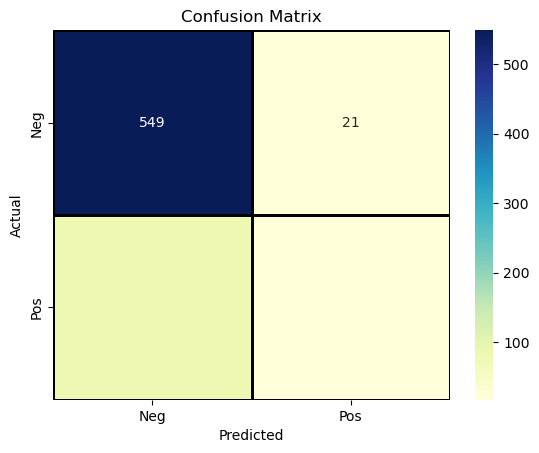

In [33]:
# Show the confusion matrix
cm = confusion_matrix(y_test,y_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

#### Logistic Regression with Cross validation

In [34]:
# We ran this through a logistic regression. We used the default parameters
# to create our baseline model. It performed poorly on both the train and test set.
lr_base = LogisticRegression(random_state=12345)

scores = cross_val_score(lr_base, X_train, y_train, cv=5, scoring="accuracy")

lr_base.fit(X_train, y_train)

lr_base_predict_train = cross_val_predict(lr_base, X_train, y_train, cv=5)
lr_base_predict_test = cross_val_predict(lr_base, X_test, y_test, cv=5)

print("lr_base_f1_train:", f1_score(y_train, lr_base_predict_train))
print("lr_base_f1_test:", f1_score(y_test, lr_base_predict_test))
print("lr_base_accuracy_test:", accuracy_score(y_test, lr_base_predict_test))
print("lr_base_mean_accuracy:", scores.mean())

lr_base_f1_train: 0.3185185185185185
lr_base_f1_test: 0.25396825396825395
lr_base_accuracy_test: 0.8590704647676162
lr_base_mean_accuracy: 0.8619656948514172


- The F1 score of 0.318 on the training data ndicates some misclassification errors, with room for improvement in capturing the minority class.
- The F1 score of 0.254 on the test data which suggests potential overfitting to the training data.
- An accuracy of 85.91% on the test data shows that our dataset might have class imbalances
- The mean accuracy of 86.20% indicates that, on average, the model performs consistently across different cross-validation folds or splits. This 
  suggests the model maintains a high level of overall correctness but may still overlook minority class predictions.







#### Roc- Auc Model on Test Data

In [35]:
probabilities_test_base = lr_base.predict_proba(X_test)
probabilities_one_test_base = probabilities_test_base[:, 1]
fpr_lr_base, tpr_lr_base, thresholds_lr_base = roc_curve(y_test, probabilities_one_test_base)
auc_roc_test_lr_base = roc_auc_score(y_test, probabilities_one_test_base)

In [36]:
auc_roc_test_lr_base

0.8000180864532466

>An AUC-ROC score of 0.801 suggests that the model has a good ability to distinguish between positive and negative classes, with higher values indicating better performance. But the better performance could be because of class imbalance








### Dealing with Class imbalance

As I was doing my analysis I realized that there are some features that have an issue of class imbalance

SMOTE (Synthetic Minority Oversampling Technique) is a type of data augmentation that uses K Nearest Neighbor to draw new samples from the minority class, in our case, churn.

Class Weight helps us communicate which class is more important to us, in this case, when churn is 1. By 'balancing' these classes, the classes are treated as equals, even though churn actually only accounts for 15% of the dataset, far less than 50%.

But here am going to use SMOTE to solve the issue of class imbalance
 

 

In [37]:
# Use smote to solve class imbalance
smote = SMOTE(random_state=12345)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### Feature Importance with GradientBoostingClassifier

Feature importance is a measure of the contribution of each feature to the predictions made by a machine learning model. Different models compute feature importance in various ways, and it is particularly useful for understanding which features are most influential in making predictions. Here, we will focus on how feature importance is determined in tree-based models, such as the XGBoost model you are using.

In [38]:
# Gradient Boosting Classifier with SMOTE training set.
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=1.0,
                                 max_depth=20, random_state=12345).fit(X_resampled, y_resampled)

print("clf_accuracy_score:", clf.score(X_test, y_test))

clf_accuracy_score: 0.8740629685157422


In [39]:
#  Feature importance
feature_importances = clf.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

feature_importances.sum()

account length: 0.0222
area code: 0.0061
total day minutes: 0.2014
total day calls: 0.0175
total eve minutes: 0.0846
total eve calls: 0.0221
total night minutes: 0.0433
total night calls: 0.0417
total intl minutes: 0.0659
total intl calls: 0.0424
customer service calls: 0.2185
international plan_yes: 0.1884
voice mail plan_yes: 0.0460


1.0

In [40]:
#   The most important features
important_feat = ['total day minutes', 'customer service calls','international plan_yes']
X_new = data[important_feat]
y_new = data["churn"]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=12345, stratify=y)

In [41]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

In [42]:
important_feat[0]

'total day minutes'

### Logistic Regression with smote

In [43]:
# logistic regression.
lr = LogisticRegression(random_state=12345)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [5, 10, 25, 50]

param = {'solver': solver, 'max_iter': max_iter}

grid_search = GridSearchCV(lr, param, cv=5, scoring='f1')

grid_search.fit(X_train_new, y_train_new)

print("best_lr_model:", grid_search.best_estimator_)


best_lr_model: LogisticRegression(max_iter=5, random_state=12345, solver='sag')


In [44]:
# Ran optimized logistic regression with SMOTE.
lr_smote = LogisticRegression(max_iter=5, random_state=12345, solver='sag')

lr_smote_scores = cross_val_score(lr_smote, X_train_new, y_train_new, cv=5, scoring="accuracy")

lr_smote.fit(X_train_new, y_train_new)

lr_smote_predict_train = cross_val_predict(lr_smote, X_train_new, y_train_new, cv=5)
lr_smote_predict_test = cross_val_predict(lr_smote, X_test_new, y_test_new, cv=5)

print("lr_smote_f1_train:", f1_score(y_train_new,lr_smote_predict_train))
print("lr_smote_f1_test:", f1_score(y_test_new,lr_smote_predict_test))
print("lr_smote_accuracy_train:", accuracy_score(y_train_new,lr_smote_predict_train))
print("lr_smote_accuracy_test:", accuracy_score(y_test_new,lr_smote_predict_test))
print("lr_smote_mean_accuracy:", lr_smote_scores.mean())

lr_smote_f1_train: 0.2895238095238095
lr_smote_f1_test: 0.09259259259259259
lr_smote_accuracy_train: 0.8600900225056264
lr_smote_accuracy_test: 0.8530734632683659
lr_smote_mean_accuracy: 0.8600916303026469


In [45]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train_new, lr_smote_predict_train)

# Calculate the confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test_new, lr_smote_predict_test)

print("Confusion Matrix (Training Data):\n", conf_matrix_train)
print("\nConfusion Matrix (Test Data):\n", conf_matrix_test)


Confusion Matrix (Training Data):
 [[2217   63]
 [ 310   76]]

Confusion Matrix (Test Data):
 [[564   6]
 [ 92   5]]


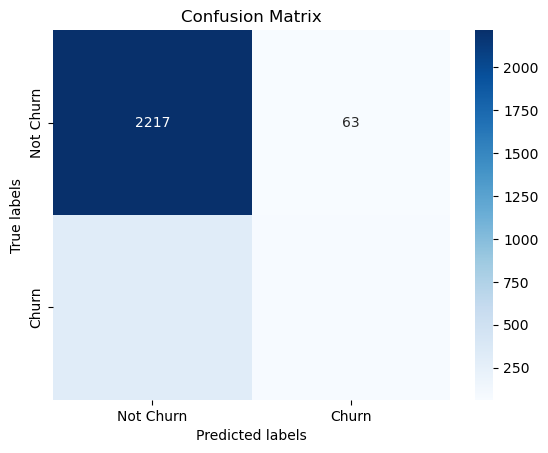

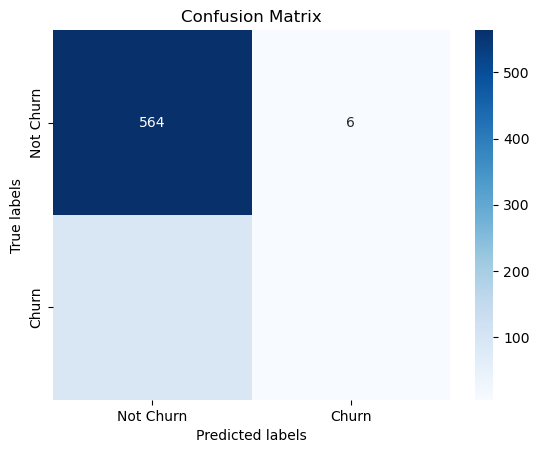

In [46]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

# Plot confusion matrix for training data
plot_confusion_matrix(y_train_new, lr_smote_predict_train, labels=['Not Churn', 'Churn'])

# Plot confusion matrix for test data
plot_confusion_matrix(y_test_new, lr_smote_predict_test, labels=['Not Churn', 'Churn'])


### Decision Tree Classifier with SMOTE

In [47]:
# Prepared the optimal decision tree with SMOTE.
dt_tree = DecisionTreeClassifier(random_state=12345)

depth = [x for x in range(2, 21, 2)]
criterion = ['gini', 'entropy']
feat = ['sqrt', 'log2']

param = [{'max_depth':depth, 'criterion': criterion, 'max_features':feat}]

grid_search = GridSearchCV(dt_tree, param, cv=5, scoring='f1')

grid_search.fit(X_train_new, y_train_new)

print("best_dt_model:", grid_search.best_estimator_)

best_dt_model: DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       random_state=12345)


In [48]:
# ecision tree with SMOTE.
dt_smote = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       random_state=12345)

dt_smote_scores = cross_val_score(dt_smote, X_train_new, y_train_new, cv=5, scoring="accuracy")

dt_smote.fit(X_train_new, y_train_new)

dt_smote_predict_train = cross_val_predict(dt_smote, X_train_new, y_train_new, cv=5)
dt_smote_predict_test = cross_val_predict(dt_smote, X_test_new, y_test_new, cv=5)

print("dt_smote_f1_train:", f1_score(y_train_new,dt_smote_predict_train))
print("dt_smote_f1_test:", f1_score(y_test_new,dt_smote_predict_test))
print("dt_smote_accuracy_test:", accuracy_score(y_test_new,dt_smote_predict_test))
print("dt_smote_mean_accuracy:", dt_smote_scores.mean())

dt_smote_f1_train: 0.5047619047619047
dt_smote_f1_test: 0.352112676056338
dt_smote_accuracy_test: 0.8620689655172413
dt_smote_mean_accuracy: 0.8829696931368621


- the F1 score on the train set is higher than the test set, indicating potential overfitting
- An accuracy of 0.8621 on the test set suggests that approximately 86.21% of the instances were classified correctly.
- It indicates the average accuracy across multiple folds. A mean accuracy of 0.8830 suggests that, on average, the model performs well across 
  different subsets of the data.

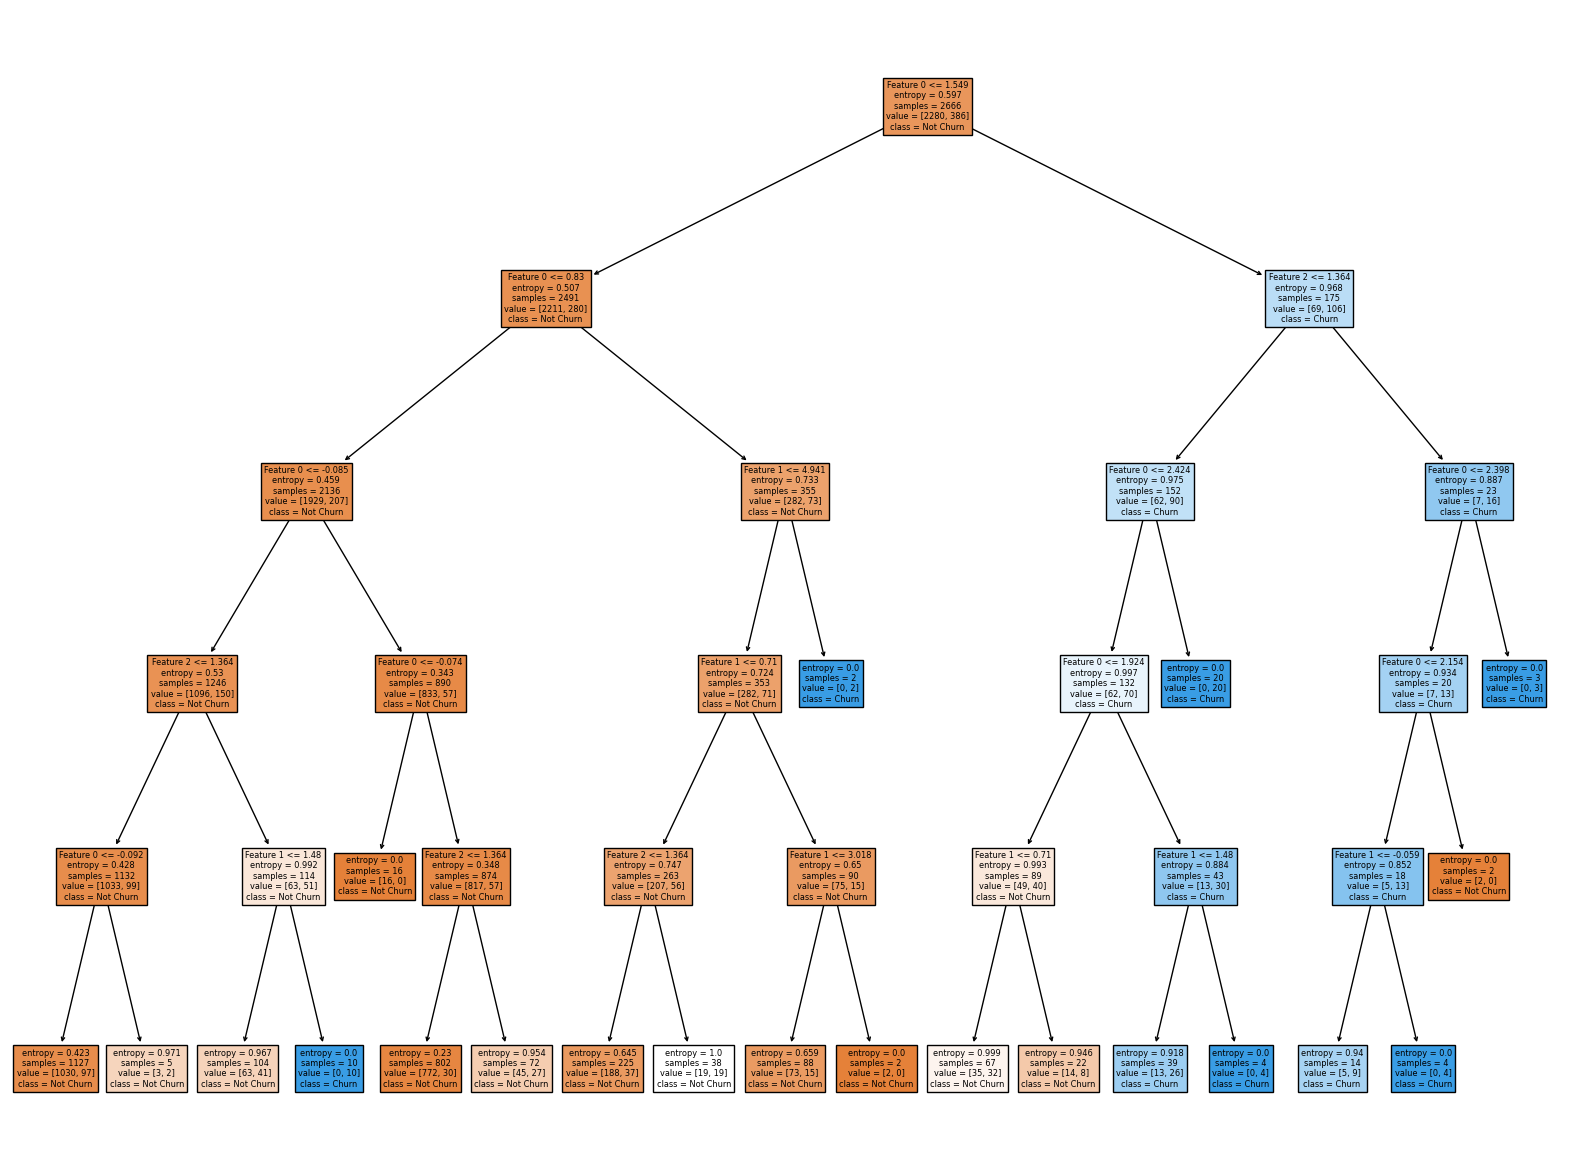

In [49]:
 # Instantiate DecisionTreeClassifier with  hyperparameters
dt_smote = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt', random_state=12345)

# Fit the model
dt_smote.fit(X_train_new, y_train_new)

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(dt_smote, filled=True, feature_names=["Feature {}".format(i) for i in range(X_train_new.shape[1])], class_names=['Not Churn', 'Churn'])
plt.show()


### Random Forest Classifier using SMOTE

In [50]:
# Prepared the optimal random forest classifier with SMOTE.
rf = RandomForestClassifier(random_state=12345)

depth = [x for x in range(2, 21, 2)]
est = [x for x in range(40, 81, 10)]
feat = ['log2', 'sqrt']

param = [{'max_depth':depth, 'n_estimators':est, 'max_features':feat}]

grid_search = GridSearchCV(rf, param, cv=5, scoring='f1')

grid_search.fit(X_train_new, y_train_new)

print("best_rf_model:", grid_search.best_estimator_)

best_rf_model: RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=70,
                       random_state=12345)


In [51]:
# Ran the optimal random forest classifier with SMOTE.
rf_smote = RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=70,
                       random_state=12345)

rf_smote_scores = cross_val_score(rf_smote, X_train_new, y_train_new, cv=5, scoring="accuracy")

rf_smote.fit(X_train_new, y_train_new)

rf_smote_predict_train = cross_val_predict(rf_smote, X_train_new, y_train_new, cv=5)
rf_smote_predict_test = cross_val_predict(rf_smote, X_test_new, y_test_new, cv=5)

print("rf_smote_f1_train:", f1_score(y_train_new,rf_smote_predict_train))
print("rf_smote_f1_test:", f1_score(y_test_new,rf_smote_predict_test))
print("rf_smote_accuracy_test:", accuracy_score(y_test_new,rf_smote_predict_test))
print("rf_smote_mean_accuracy:", rf_smote_scores.mean())

rf_smote_f1_train: 0.5106990014265335
rf_smote_f1_test: 0.4021739130434782
rf_smote_accuracy_test: 0.8350824587706147
rf_smote_mean_accuracy: 0.8713479632635567


#### Results Evaluation

- the F1 score on the train set is higher than the test set, indicating potential overfitting.

- An accuracy of 0.8351 on the test set suggests that approximately 83.51% of the instances were classified correctly.

- A mean accuracy of 0.8713 suggests that, on average, the model performs well across different subsets of the data.

## Comparing our four models' AUC-ROC Curves

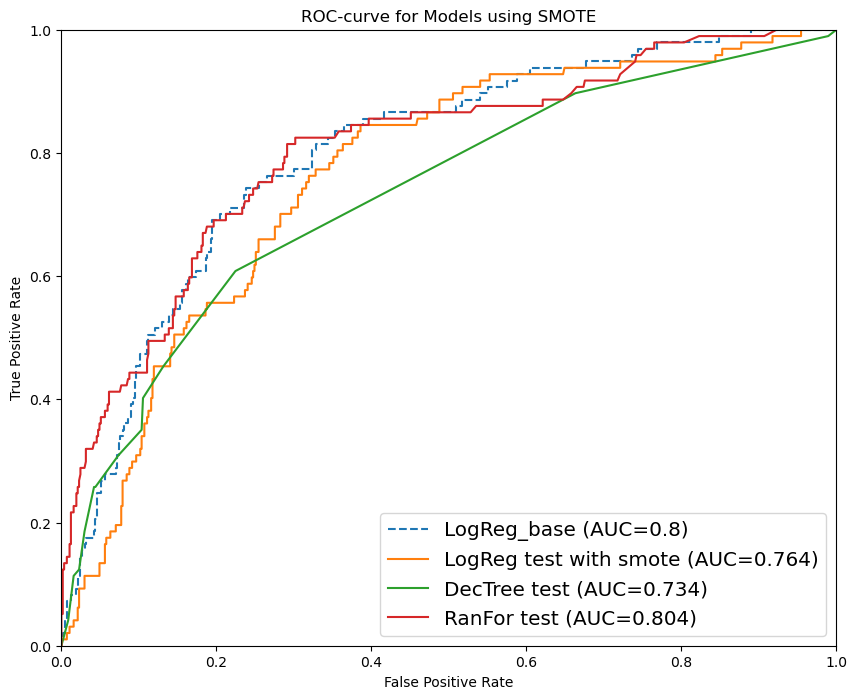

In [52]:
# Building AUC-ROC curve for all 4 SMOTE models

probabilities_test_lr_smote = lr_smote.predict_proba(X_test_new)
probabilities_one_test_lr_smote = probabilities_test_lr_smote[:, 1]
fpr_lr_smote, tpr_lr_smote, thresholds_lr_smote = roc_curve(y_test_new, probabilities_one_test_lr_smote)
auc_roc_test_lr_smote = roc_auc_score(y_test_new, probabilities_one_test_lr_smote)

probabilities_test_dt_smote = dt_smote.predict_proba(X_test_new)
probabilities_one_test_dt_smote = probabilities_test_dt_smote[:, 1]
fpr_dt_smote, tpr_dt_smote, thresholds_dt_smote = roc_curve(y_test_new, probabilities_one_test_dt_smote)
auc_roc_test_dt_smote = roc_auc_score(y_test_new, probabilities_one_test_dt_smote)

probabilities_test_rf_smote = rf_smote.predict_proba(X_test_new)
probabilities_one_test_rf_smote = probabilities_test_rf_smote[:, 1]
fpr_rf_smote, tpr_rf_smote, thresholds_rf_smote = roc_curve(y_test_new, probabilities_one_test_rf_smote)
auc_roc_test_rf_smote = roc_auc_score(y_test_new, probabilities_one_test_rf_smote)

 
plt.figure(figsize=[10, 8])
plt.plot(fpr_lr_base, tpr_lr_base, linestyle='--', label=f'LogReg_base (AUC={round(auc_roc_test_lr_base, 3)})')
plt.plot(fpr_lr_smote, tpr_lr_smote, label=f'LogReg test with smote (AUC={round(auc_roc_test_lr_smote, 3)})')
plt.plot(fpr_dt_smote, tpr_dt_smote, label=f'DecTree test (AUC={round(auc_roc_test_dt_smote, 3)})')
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'RanFor test (AUC={round(auc_roc_test_rf_smote, 3)})')
# plt.plot(fpr_lgbm_smote, tpr_lgbm_smote, label=f'LGBM test (AUC={round(auc_roc_test_lgbm_smote, 3)})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize='x-large')
plt.title("ROC-curve for Models using SMOTE")
plt.show()

### Conclusion

The best model, is the Decision Tree Model with an accuracy of  82.4% accuracy. The most important features `international plan`, `total minutes` talked during the day, and the number of `customer service calls`. These features significantly contributed to the model's predictive power and overall performance

### Recommendations

- Focus marketing efforts on clients with internal plans to increase retention and satisfaction through 
 targeted incentives.

- Monitor and optimize daily call minutes, offering tailored plans for heavy users to improve customer 
 experience.

- Enhance customer service quality, reducing the number of calls by addressing common issues effectively 
  and proactively.

 ### Next Steps

- Integrating datetime data enables temporal analysis, tracking trends, and identifying 
  seasonality in customer interactions for actionable insights.

- Leveraging NLP models extracts sentiment and topics from customer feedback, correlating 
  sentiments with churn, satisfaction, and preferences.

- Predictive modeling forecasts churn and identifies drivers using datetime and sentiment- 
  based features, guiding retention and service improvement strategies.

- Continuous monitoring, iteration, and automation ensure effectiveness, enabling refinement 
  and optimization of analysis and modeling processes.